In [ ]:
%pip install openassetpricing

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df_stock = pd.read_stata("CRSP Universe Monthly Stock File 1960-2018.dta")

In [4]:
df_stock.columns

Index(['permno', 'date', 'nameendt', 'shrcd', 'exchcd', 'siccd', 'ncusip',
       'ticker', 'comnam', 'shrcls', 'tsymbol', 'naics', 'primexch', 'trdstat',
       'secstat', 'permco', 'issuno', 'hexcd', 'hsiccd', 'cusip', 'dclrdt',
       'dlamt', 'dlpdt', 'dlstcd', 'nextdt', 'paydt', 'rcrddt', 'shrflg',
       'hsicmg', 'hsicig', 'distcd', 'divamt', 'facpr', 'facshr', 'acperm',
       'accomp', 'shrenddt', 'nwperm', 'dlretx', 'dlprc', 'dlret', 'trtscd',
       'nmsind', 'mmcnt', 'nsdinx', 'bidlo', 'askhi', 'prc', 'vol', 'ret',
       'bid', 'ask', 'shrout', 'cfacpr', 'cfacshr', 'altprc', 'spread',
       'altprcdt', 'retx', 'vwretd', 'vwretx', 'ewretd', 'ewretx', 'sprtrn'],
      dtype='object')

In [5]:
df_stock.head()

,permno,date,nameendt,shrcd,exchcd,siccd,ncusip,ticker,comnam,shrcls,...,cfacshr,altprc,spread,altprcdt,retx,vwretd,vwretx,ewretd,ewretx,sprtrn
0,10000.0,1985-12-31,NaT,NaN,NaN,NaN,,,,,...,NaN,-2.5625,NaN,1986-01-07,NaN,0.043061,0.040080,0.028021,0.026355,0.045061
1,10000.0,1986-01-31,1986-12-03,10.0,3.0,3990.0,68391610,OMFGA,OPTIMUM MANUFACTURING INC,A,...,1.0,-4.3750,0.250,1986-01-31,NaN,0.009829,0.008006,0.044071,0.043082,0.002367
2,10000.0,1986-02-28,NaT,10.0,3.0,3990.0,68391610,OMFGA,OPTIMUM MANUFACTURING INC,A,...,1.0,-3.2500,0.250,1986-02-28,-0.257143,0.072500,0.068190,0.060381,0.058938,0.071489
3,10000.0,1986-03-31,NaT,10.0,3.0,3990.0,68391610,OMFGA,OPTIMUM MANUFACTURING INC,A,...,1.0,-4.4375,0.125,1986-03-31,0.365385,0.053885,0.051360,0.047192,0.045679,0.052794
4,10000.0,1986-04-30,NaT,10.0,3.0,3990.0,68391610,OMFGA,OPTIMUM MANUFACTURING INC,A,...,1.0,-4.0000,0.250,1986-04-30,-0.098592,-0.007903,-0.009633,0.016140,0.015141,-0.014148


In [6]:
df_stock['date'] = pd.to_datetime(df_stock["date"], format="%Y%m")
df_stock['date'] = df_stock['date'].dt.strftime('%Y-%m')
df_stock.head()


,permno,date,nameendt,shrcd,exchcd,siccd,ncusip,ticker,comnam,shrcls,...,cfacshr,altprc,spread,altprcdt,retx,vwretd,vwretx,ewretd,ewretx,sprtrn
0,10000.0,1985-12,NaT,NaN,NaN,NaN,,,,,...,NaN,-2.5625,NaN,1986-01-07,NaN,0.043061,0.040080,0.028021,0.026355,0.045061
1,10000.0,1986-01,1986-12-03,10.0,3.0,3990.0,68391610,OMFGA,OPTIMUM MANUFACTURING INC,A,...,1.0,-4.3750,0.250,1986-01-31,NaN,0.009829,0.008006,0.044071,0.043082,0.002367
2,10000.0,1986-02,NaT,10.0,3.0,3990.0,68391610,OMFGA,OPTIMUM MANUFACTURING INC,A,...,1.0,-3.2500,0.250,1986-02-28,-0.257143,0.072500,0.068190,0.060381,0.058938,0.071489
3,10000.0,1986-03,NaT,10.0,3.0,3990.0,68391610,OMFGA,OPTIMUM MANUFACTURING INC,A,...,1.0,-4.4375,0.125,1986-03-31,0.365385,0.053885,0.051360,0.047192,0.045679,0.052794
4,10000.0,1986-04,NaT,10.0,3.0,3990.0,68391610,OMFGA,OPTIMUM MANUFACTURING INC,A,...,1.0,-4.0000,0.250,1986-04-30,-0.098592,-0.007903,-0.009633,0.016140,0.015141,-0.014148


In [7]:
df_stock["permno"] = df_stock["permno"].astype(int)
df_stock.head()

,permno,date,nameendt,shrcd,exchcd,siccd,ncusip,ticker,comnam,shrcls,...,cfacshr,altprc,spread,altprcdt,retx,vwretd,vwretx,ewretd,ewretx,sprtrn
0,10000,1985-12,NaT,NaN,NaN,NaN,,,,,...,NaN,-2.5625,NaN,1986-01-07,NaN,0.043061,0.040080,0.028021,0.026355,0.045061
1,10000,1986-01,1986-12-03,10.0,3.0,3990.0,68391610,OMFGA,OPTIMUM MANUFACTURING INC,A,...,1.0,-4.3750,0.250,1986-01-31,NaN,0.009829,0.008006,0.044071,0.043082,0.002367
2,10000,1986-02,NaT,10.0,3.0,3990.0,68391610,OMFGA,OPTIMUM MANUFACTURING INC,A,...,1.0,-3.2500,0.250,1986-02-28,-0.257143,0.072500,0.068190,0.060381,0.058938,0.071489
3,10000,1986-03,NaT,10.0,3.0,3990.0,68391610,OMFGA,OPTIMUM MANUFACTURING INC,A,...,1.0,-4.4375,0.125,1986-03-31,0.365385,0.053885,0.051360,0.047192,0.045679,0.052794
4,10000,1986-04,NaT,10.0,3.0,3990.0,68391610,OMFGA,OPTIMUM MANUFACTURING INC,A,...,1.0,-4.0000,0.250,1986-04-30,-0.098592,-0.007903,-0.009633,0.016140,0.015141,-0.014148


In [8]:
import openassetpricing as oap

In [9]:
oap.list_release()

┌───────────┐
│   Release │
├───────────┤
│      2022 │
│      2023 │
│    202408 │
│    202410 │
└───────────┘


In [10]:
openap = oap.OpenAP(202410)

In [11]:
df_bm = openap.dl_signal('pandas', ['BM'])


Data is downloaded: 8s


In [12]:

df_bm["date"] = pd.to_datetime(df_bm["yyyymm"].astype(str), format='%Y%m')
df_bm["date"] = df_bm["date"].dt.strftime("%Y-%m")
df_bm.head()

,permno,yyyymm,BM,date
0,10000,198704,-2.895161,1987-04
1,10000,198705,-2.895161,1987-05
2,10001,198612,-0.104958,1986-12
3,10001,198701,-0.104958,1987-01
4,10001,198702,-0.104958,1987-02


In [13]:
df = pd.merge(df_stock, df_bm, left_on=["permno", "date"], right_on=["permno", "date"], how="inner")
df.head()


,permno,date,nameendt,shrcd,exchcd,siccd,ncusip,ticker,comnam,shrcls,...,spread,altprcdt,retx,vwretd,vwretx,ewretd,ewretx,sprtrn,yyyymm,BM
0,10000,1987-04,NaT,10.0,3.0,3990.0,68391610,OMFGA,OPTIMUM MANUFACTURING INC,A,...,0.03125,1987-04-30,-0.062500,-0.017001,-0.018898,-0.017707,-0.018655,-0.011450,198704,-2.895161
1,10000,1987-05,NaT,10.0,3.0,3990.0,68391610,OMFGA,OPTIMUM MANUFACTURING INC,A,...,0.06250,1987-05-29,-0.066667,0.005125,0.001874,0.000599,-0.000578,0.006034,198705,-2.895161
2,10001,1986-12,NaT,11.0,3.0,4920.0,39040610,GFGC,GREAT FALLS GAS CO,,...,NaN,1986-12-31,0.000000,-0.026388,-0.029057,-0.034609,-0.036117,-0.028288,198612,-0.104958
3,10001,1987-01,NaT,11.0,3.0,4920.0,39040610,GFGC,GREAT FALLS GAS CO,,...,NaN,1987-01-30,-0.035714,0.128496,0.126924,0.117565,0.116677,0.131767,198701,-0.104958
4,10001,1987-02,NaT,11.0,3.0,4920.0,39040610,GFGC,GREAT FALLS GAS CO,,...,NaN,1987-02-27,-0.074074,0.047918,0.044491,0.074612,0.073463,0.036924,198702,-0.104958


In [14]:
df["date"].dtype

dtype('O')

Vorgehen

- log returns berechnen
- log(Pt+/Bt+) - log(Pt-1/Bt-1)  --> Change in aggregate valuation
- log(Bt-/Bt-1) - log(Dt-/Pt-)   --> Income Yield
- log(Pt-/Bt-) - log(Pt+/Bt+)    --> Migration

Price --> altprc


Probleme

- Werte Pt- und Bt- korrekt zu bestimmen!

In [15]:
print(df.columns)

Index(['permno', 'date', 'nameendt', 'shrcd', 'exchcd', 'siccd', 'ncusip',
       'ticker', 'comnam', 'shrcls', 'tsymbol', 'naics', 'primexch', 'trdstat',
       'secstat', 'permco', 'issuno', 'hexcd', 'hsiccd', 'cusip', 'dclrdt',
       'dlamt', 'dlpdt', 'dlstcd', 'nextdt', 'paydt', 'rcrddt', 'shrflg',
       'hsicmg', 'hsicig', 'distcd', 'divamt', 'facpr', 'facshr', 'acperm',
       'accomp', 'shrenddt', 'nwperm', 'dlretx', 'dlprc', 'dlret', 'trtscd',
       'nmsind', 'mmcnt', 'nsdinx', 'bidlo', 'askhi', 'prc', 'vol', 'ret',
       'bid', 'ask', 'shrout', 'cfacpr', 'cfacshr', 'altprc', 'spread',
       'altprcdt', 'retx', 'vwretd', 'vwretx', 'ewretd', 'ewretx', 'sprtrn',
       'yyyymm', 'BM'],
      dtype='object')


Here’s a breakdown of the columns you've listed from the CRSP stock data:

permno:
Description: Unique permanent identifier for each stock in the CRSP database.
Type: Integer.
date:
Description: The date for the data point (typically monthly).
Type: DateTime (monthly).
nameendt:
Description: The end date for the stock's name (can be relevant for name changes).
Type: DateTime.
shrcd:
Description: Share code that identifies the type of shares (e.g., common, preferred).
Type: Integer.
exchcd:
Description: Exchange code (e.g., NYSE, NASDAQ).
Type: Integer.
siccd:
Description: Standard Industrial Classification code, representing the industry of the firm.
Type: Integer.
ncusip:
Description: The company's CUSIP identifier (unique identifier for the company).
Type: String.
ticker:
Description: Ticker symbol used for stock trading.
Type: String.
comnam:
Description: Company name.
Type: String.
shrcls:
Description: Share class code (indicating different types of shares).
Type: Integer.
tsymbol:
Description: Stock's trading symbol.
Type: String.
naics:
Description: North American Industry Classification System code.
Type: Integer.
primexch:
Description: The primary exchange where the stock is listed.
Type: Integer.
trdstat:
Description: Trading status (active, inactive, etc.).
Type: Integer.
secstat:
Description: Security status (e.g., listed, delisted).
Type: Integer.
permco:
Description: Unique identifier for the company (distinct from permno, which is stock-specific).
Type: Integer.
issuno:
Description: The number of the issue (different from the company, which might have multiple issues).
Type: Integer.
hexcd:
Description: The exchange code for the stock.
Type: Integer.
hsiccd:
Description: A code that categorizes the industry sector (from SIC codes).
Type: Integer.
cusip:
Description: CUSIP identifier for the stock.
Type: String.
dclrdt:
Description: The date the dividend was declared.
Type: DateTime.
dlamt:
Description: The dividend amount declared.
Type: Float.
dlpdt:
Description: The date the dividend was paid.
Type: DateTime.
dlstcd:
Description: The code for the dividend status (paid, etc.).
Type: Integer.
nextdt:
Description: The date for the next dividend or relevant corporate action.
Type: DateTime.
paydt:
Description: The payment date for dividends.
Type: DateTime.
rcrddt:
Description: The record date for the dividend or corporate action.
Type: DateTime.
shrflg:
Description: Flag indicating the share structure (e.g., class of shares).
Type: Integer.
hsicmg:
Description: A code for the industry category (HSIC) of the stock.
Type: Integer.
hsicig:
Description: A code for the industry classification group (HSIC).
Type: Integer.
distcd:
Description: Distribution code (can be for dividends or other actions).
Type: Integer.
divamt:
Description: The amount of dividend paid.
Type: Float.
facpr:
Description: The factor for price adjustment (often for stock splits).
Type: Float.
facshr:
Description: The factor for share adjustment (e.g., stock splits).
Type: Float.
acperm:
Description: The company’s permanent ID (used for mergers and acquisitions).
Type: Integer.
accomp:
Description: The company ID after a merger or acquisition.
Type: Integer.
shrenddt:
Description: The end date of the stock’s share class or listing.
Type: DateTime.
nwperm:
Description: The new permanent identifier after a corporate change.
Type: Integer.
dlretx:
Description: The total return of the stock, including dividends.
Type: Float.
dlprc:
Description: The price of the stock after adjustments (e.g., for splits).
Type: Float.
dlret:
Description: The price return of the stock excluding dividends.
Type: Float.
trtscd:
Description: A code for the stock's trading status (active, delisted, etc.).
Type: Integer.
nmsind:
Description: Industry sector indicator.
Type: Integer.
mmcnt:
Description: Market maker count.
Type: Integer.
nsdinx:
Description: The index status for the stock (for index inclusion).
Type: Integer.
bidlo:
Description: The lowest bid price of the stock.
Type: Float.
askhi:
Description: The highest ask price of the stock.
Type: Float.
prc:
Description: The price of the stock.
Type: Float.
vol:
Description: The trading volume of the stock.
Type: Integer.
ret:
Description: The simple return of the stock.
Type: Float.
bid:
Description: The bid price of the stock.
Type: Float.
ask:
Description: The ask price of the stock.
Type: Float.
shrout:
Description: The number of outstanding shares for the stock.
Type: Integer.
cfacpr:
Description: The factor for price adjustment (such as for stock splits).
Type: Float.
cfacshr:
Description: The factor for share adjustment (such as for stock splits).
Type: Float.
altprc:
Description: Alternative price for the stock (may represent a different pricing source).
Type: Float.
spread:
Description: The bid-ask spread.
Type: Float.
altprcdt:
Description: The date of the alternative price.
Type: DateTime.
retx:
Description: The total return of the stock, including dividends, with a different computation or adjustments.
Type: Float.
vwretd:
Description: Value-weighted return of the stock index.
Type: Float.

In [16]:
df = df.drop_duplicates(subset=["date", "permno"], keep="first")
duplicates = df[df.duplicated(subset=['date', 'permno'], keep=False)]
print(duplicates)


Empty DataFrame
Columns: [permno, date, nameendt, shrcd, exchcd, siccd, ncusip, ticker, comnam, shrcls, tsymbol, naics, primexch, trdstat, secstat, permco, issuno, hexcd, hsiccd, cusip, dclrdt, dlamt, dlpdt, dlstcd, nextdt, paydt, rcrddt, shrflg, hsicmg, hsicig, distcd, divamt, facpr, facshr, acperm, accomp, shrenddt, nwperm, dlretx, dlprc, dlret, trtscd, nmsind, mmcnt, nsdinx, bidlo, askhi, prc, vol, ret, bid, ask, shrout, cfacpr, cfacshr, altprc, spread, altprcdt, retx, vwretd, vwretx, ewretd, ewretx, sprtrn, yyyymm, BM]
Index: []

[0 rows x 66 columns]


In [17]:
#Returns computation
returns = df.pivot(index="date", columns="permno", values="ret")
returns.index = pd.to_datetime(returns.index)
returns.index = returns.index.to_period("M")
bm = df.pivot(index="date", columns="permno", values="BM")
bm.head()

permno,10000,10001,10002,10003,10005,10006,10007,10008,10009,10010,...,93422,93426,93427,93428,93429,93432,93433,93434,93435,93436
date,,,,,,,,,,,,,,,,,,,,,
1960-01,NaN,NaN,NaN,NaN,NaN,0.466345,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-02,NaN,NaN,NaN,NaN,NaN,0.466345,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-03,NaN,NaN,NaN,NaN,NaN,0.466345,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-04,NaN,NaN,NaN,NaN,NaN,0.466345,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-05,NaN,NaN,NaN,NaN,NaN,0.466345,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
returns.index.dtype

period[M]

In [19]:
#Dividends computation
dividends = df.pivot(index="date", columns="permno", values="dlamt")
#dividends.index = dividends.index.to_period("M")
dividends.head()

permno,10000,10001,10002,10003,10005,10006,10007,10008,10009,10010,...,93422,93426,93427,93428,93429,93432,93433,93434,93435,93436
date,,,,,,,,,,,,,,,,,,,,,
1960-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#Book Value computation

# Market Equity = price * shares outstanding
df['market_equity'] = df['prc'].abs() * df['shrout'] * 1000  # in dollars

# Book Equity = Market Equity × (Book-to-Market)
df['book_equity'] = abs(df['market_equity'] * df['BM'])

In [21]:
# Ensure 'date' is datetime
df['date'] = pd.to_datetime(df['date'])

# Convert returns to numeric, set invalid entries (e.g. 'C', 'B') to NaN
df['ret'] = pd.to_numeric(df['ret'], errors='coerce')

# Drop rows with missing returns
df = df.dropna(subset=['ret'])

# Compute monthly log returns
df['log_ret'] = np.log1p(df['ret'])  # log(1 + ret)

# Adjust fiscal year to run from June to May
# Fiscal year starts in June; if the month is before June, assign it to the previous year
df['fiscal_year'] = df['date'].dt.year.where(df['date'].dt.month >= 6, df['date'].dt.year - 1)

# Group by fiscal year and permno
def annualized_log_return(x):
    n = len(x)
    if n >= 9:  # Make sure we have at least 9 months of data for the fiscal year
        return x.sum() * (12 / n)  # Annualize if we have less than 12 months of data
    else:
        return np.nan

# Apply and reshape to get portfolio-level data
annual_log_returns = df.groupby(['fiscal_year', 'permno'])['log_ret'].apply(annualized_log_return).unstack('permno')
annual_log_returns.index = pd.to_datetime(annual_log_returns.index.astype(str) + "-06")
annual_log_returns.index = annual_log_returns.index.to_period("M")
annual_log_returns.head()

permno,10000,10001,10002,10003,10005,10006,10007,10008,10009,10010,...,93422,93426,93427,93428,93429,93432,93433,93434,93435,93436
fiscal_year,,,,,,,,,,,,,,,,,,,,,
1959-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-06,NaN,NaN,NaN,NaN,NaN,0.337212,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-06,NaN,NaN,NaN,NaN,NaN,0.039382,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-06,NaN,NaN,NaN,NaN,NaN,0.517020,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963-06,NaN,NaN,NaN,NaN,NaN,0.360593,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
annual_log_returns.index.dtype

period[M]

In [23]:
bm.index = pd.to_datetime(bm.index, format="ISO8601")
bm_june = bm[bm.index.month == 6]
bm_june.index = pd.to_datetime(bm_june.index).strftime("%Y-%m")
bm_june = bm_june.abs()
bm_june.head()

permno,10000,10001,10002,10003,10005,10006,10007,10008,10009,10010,...,93422,93426,93427,93428,93429,93432,93433,93434,93435,93436
date,,,,,,,,,,,,,,,,,,,,,
1960-06,NaN,NaN,NaN,NaN,NaN,0.466345,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-06,NaN,NaN,NaN,NaN,NaN,0.657796,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-06,NaN,NaN,NaN,NaN,NaN,0.401820,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963-06,NaN,NaN,NaN,NaN,NaN,0.180738,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964-06,NaN,NaN,NaN,NaN,NaN,0.011987,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#Bookvalue Pivot
bookvalue = df.pivot(index="date", columns="permno", values="book_equity")
#bookvalue.index = pd.to_datetime(bookvalue.index).strftime("%Y-%m")
bookvalue.index = bookvalue.index.to_period("M")
bookvalue.head()

permno,10000,10001,10002,10003,10005,10006,10007,10008,10009,10010,...,93422,93426,93427,93428,93429,93432,93433,93434,93435,93436
date,,,,,,,,,,,,,,,,,,,,,
1960-01,NaN,NaN,NaN,NaN,NaN,3.223726e+07,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-02,NaN,NaN,NaN,NaN,NaN,3.331183e+07,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-03,NaN,NaN,NaN,NaN,NaN,3.132800e+07,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-04,NaN,NaN,NaN,NaN,NaN,2.876555e+07,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-05,NaN,NaN,NaN,NaN,NaN,2.975747e+07,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
price = df.pivot(index="date", columns="permno", values="altprc")
#price.index = pd.to_datetime(price.index).strftime("%Y-%m")
price.index = price.index.to_period("M")
price.abs()
price.head()

permno,10000,10001,10002,10003,10005,10006,10007,10008,10009,10010,...,93422,93426,93427,93428,93429,93432,93433,93434,93435,93436
date,,,,,,,,,,,,,,,,,,,,,
1960-01,NaN,NaN,NaN,NaN,NaN,48.750,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-02,NaN,NaN,NaN,NaN,NaN,50.375,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-03,NaN,NaN,NaN,NaN,NaN,47.375,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-04,NaN,NaN,NaN,NaN,NaN,43.500,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-05,NaN,NaN,NaN,NaN,NaN,45.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
shrout = df.pivot(index="date", columns="permno", values="shrout")
shrout.index = shrout.index.to_period("M")
shrout.head()

permno,10000,10001,10002,10003,10005,10006,10007,10008,10009,10010,...,93422,93426,93427,93428,93429,93432,93433,93434,93435,93436
date,,,,,,,,,,,,,,,,,,,,,
1960-01,NaN,NaN,NaN,NaN,NaN,1418.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-02,NaN,NaN,NaN,NaN,NaN,1418.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-03,NaN,NaN,NaN,NaN,NaN,1418.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-04,NaN,NaN,NaN,NaN,NaN,1418.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-05,NaN,NaN,NaN,NaN,NaN,1418.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
market_cap = price * shrout
market_cap.tail()

permno,10000,10001,10002,10003,10005,10006,10007,10008,10009,10010,...,93422,93426,93427,93428,93429,93432,93433,93434,93435,93436
date,,,,,,,,,,,,,,,,,,,,,
2018-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.362651e+06,539041.690502,1.745053e+06,NaN,NaN,NaN,NaN,83171.201239,NaN,5.146109e+07
2018-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.682568e+06,465592.618996,1.686362e+06,NaN,NaN,NaN,NaN,63592.201238,NaN,4.542871e+07
2018-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.111456e+06,403970.059498,1.595519e+06,NaN,NaN,NaN,NaN,72774.798761,NaN,5.792898e+07
2018-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.901271e+06,422394.573799,1.942204e+06,NaN,NaN,NaN,NaN,91341.250000,NaN,6.018898e+07
2018-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.333021e+06,376333.264301,1.889901e+06,NaN,NaN,NaN,NaN,60119.148099,NaN,5.715274e+07


In [28]:
# Step 1: Align both DataFrames
aligned_returns, aligned_mcap = annual_log_returns.align(market_cap, join='inner')

# Step 2: Compute weights by date
weights = aligned_mcap.div(aligned_mcap.sum(axis=1), axis=0)

# Step 3: Weighted log returns per permno
value_weighted_annual_log_returns = aligned_returns * weights

# value_weighted_annual_log_returns is still wide: index = date, columns = permno

value_weighted_annual_log_returns.tail()


permno,10000,10001,10002,10003,10005,10006,10007,10008,10009,10010,...,93422,93426,93427,93428,93429,93432,93433,93434,93435,93436
2014-06,NaN,-4.390262e-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.000187,-2.444604e-06,-1.878544e-06,0.000023,0.000038,NaN,NaN,-1.730524e-06,NaN,0.000324
2015-06,NaN,-1.739213e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.000002,2.529580e-07,2.550794e-05,0.000010,0.000026,NaN,NaN,5.426841e-08,NaN,-0.000228
2016-06,NaN,2.857125e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.000169,2.594980e-06,-6.572423e-07,-0.000007,0.000112,NaN,NaN,-5.571833e-07,NaN,0.000857
2017-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000027,9.446321e-06,-2.615911e-07,NaN,0.000079,NaN,NaN,-6.914256e-07,NaN,-0.000629
2018-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
#price.index.dtype
#bookvalue.index.dtype
#dividends.index.dtype
#returns.index.dtype
#annual_log_returns.index.dtype
dividends.index = pd.to_datetime(dividends.index, format="%Y-%m")
dividends.index = dividends.index.to_period("M")


In [ ]:
#pd.to_pickle(bm, "bm.pkl")
#pd.to_pickle(bm_june, "bm_june.pkl")
#pd.to_pickle(df, "df.pkl")
#pd.to_pickle(df_stock, "df_stock.pkl")
#pd.to_pickle(returns, "returns.pkl")
#pd.to_pickle(df_bm, "df_bm.pkl")
#pd.to_pickle(annual_log_returns, "annual_log_returns.pkl")
#pd.to_pickle(dividends, "dividends.pkl")
#pd.to_pickle(bookvalue, "bookvalue.pkl")
#pd.to_pickle(price, "price.pkl")
#pd.to_pickle(shrout, "shrout.pkl")
#pd.to_pickle(market_cap, "market_cap.pkl")

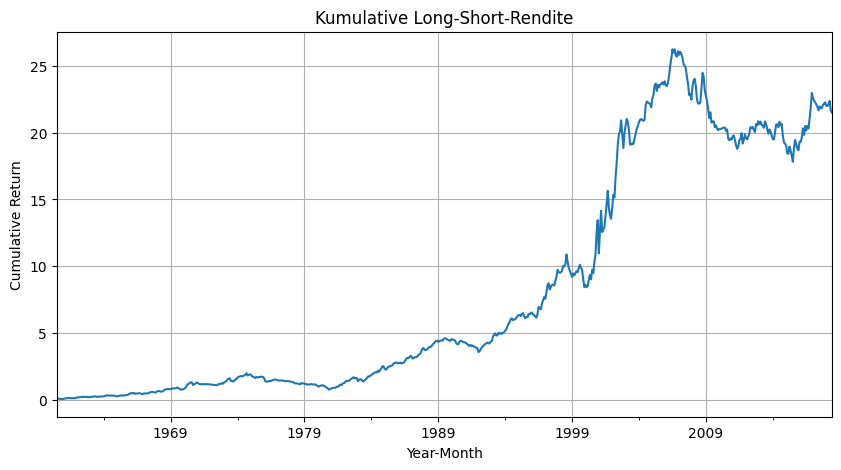

In [54]:
long_short_returns = []
bm_june.index = pd.to_datetime(bm_june.index, format="%Y-%m")
#returns.index = pd.to_datetime(returns.index)
#returns.index = returns.index.to_period("M")
log_returns = []

price_long_ts = []
dividends_long_ts = []
bookvalue_long_ts = []
price_minus_long_ts = []
bookvalue_minus_long_ts = []
long_log_returns = []

price_short_ts = []
dividends_short_ts = []
bookvalue_short_ts = []
price_minus_short_ts = []
bookvalue_minus_short_ts = []
short_log_returns = []

portfolio_value_long = []
portfolio_value_short = []

for year in sorted(set(date.year for date in bm_june.index)):
    date = pd.Timestamp(f"{year}-06")

    if date not in bm_june.index:
        continue

    clean_row = bm_june.loc[date].dropna().sort_values()
    n = len(clean_row)
    if n == 0:
        continue

    k = int(n * 0.3)
    bottom_permnos = clean_row.iloc[:k].index.tolist()
    top_permnos = clean_row.iloc[-k:].index.tolist()

    #Since the dataset contains data upto December 2018 and the fiscal year begins in June the loop would try to access data in 2019
    if year == 2018:
        continue 

    # Timeframe: July-June
    month_range = pd.date_range(start=date + pd.DateOffset(months=1), periods=12, freq="ME")
    month_range = month_range.to_period('M')

    #Portfolio Weighted Market Capitalization: P_t- 
    target_date = f"{year + 1}-06"  # this should match the index format in price
    top_date = pd.to_datetime(target_date)
    df['date'] = pd.to_datetime(df['date'])


    #Market Capitalization for Long-Positions
       
    # Step 1: Filter df to get shares outstanding for the relevant date and permnos
    shrout_filtered_m_long = df[(df['date'] == top_date) & (df['permno'].isin(bottom_permnos))]
    shrout_filtered_m_short = df[(df['date'] == top_date) & (df['permno'].isin(top_permnos))]
    # Step 2: Pivot so we get a Series indexed by permno, with shrout as values
    shrout_series_m_long = shrout_filtered_m_long.set_index('permno')['shrout']
    shrout_series_m_short = shrout_filtered_m_short.set_index('permno')['shrout']
    # Step 3: Get the matching prices and multiply
    bottom_m_prc = price.loc[target_date, price.columns.intersection(bottom_permnos)].dropna()
    top_m_prc = price.loc[target_date, price.columns.intersection(top_permnos)].dropna()
    # Ensure both Series are aligned
    sharesoutstanding_m_long = shrout_series_m_long.reindex(bottom_m_prc.index)
    sharesoutstanding_m_short = shrout_series_m_short.reindex(top_m_prc.index)
    # Step 4: Multiply
    long_m_prc = bottom_m_prc * sharesoutstanding_m_long
    short_m_prc = top_m_prc * sharesoutstanding_m_short

    #top_m_prc = price.loc[(f"{year + 1}-06"), price.columns.intersection(top_permnos)].dropna() * sharesoutstandint
    #bottom_m_prc = price.loc[(f"{year + 1}-06"), price.columns.intersection(bottom_permnos)].dropna()
    price_minus_long_ts.append({"date" : top_date, "avg_value" : sum(long_m_prc)/len(long_m_prc)})
    price_minus_short_ts.append({"date" : top_date, "avg_value" :sum(short_m_prc)/len(short_m_prc)})

    #Portfolio Weighted Book Value
    top_m_bv = bookvalue.loc[(f"{year + 1}-06"), bookvalue.columns.intersection(top_permnos)].dropna()
    bottom_m_bv = bookvalue.loc[(f"{year + 1}-06"), bookvalue.columns.intersection(bottom_permnos)].dropna()
    bookvalue_minus_long_ts.append({"date" : f"{year + 1}-06", "avg_value" : sum(bottom_m_bv)/len(bottom_m_bv)})
    bookvalue_minus_short_ts.append({"date" : f"{year + 1}-06", "avg_value" : sum(top_m_bv)/len(top_m_bv)})

    #Annual log-returns
    log_top_rets = annual_log_returns.loc[(f"{year}-06"), annual_log_returns.columns.intersection(top_permnos)].dropna()
    log_bottom_rets = annual_log_returns.loc[(f"{year}-06"), annual_log_returns.columns.intersection(bottom_permnos)].dropna()

    long_log_returns.append({"date" : f"{year}-06", "avg_value" :sum(log_bottom_rets)/len(log_bottom_rets)})
    short_log_returns.append({"date" : f"{year}-06", "avg_value" :sum(log_top_rets)/len(log_top_rets)})

    for m in month_range:
        #m = m.to_period("M")
        if m not in returns.index:
            print("m not in returns.index")
            continue
        
        top_rets = returns.loc[m, returns.columns.intersection(top_permnos)]
        bottom_rets = returns.loc[m, returns.columns.intersection(bottom_permnos)]

        #Portfolio weighted market capitalization       
        # Step 1: Filter df to get shares outstanding for the relevant date and permnos
        shrout_filtered_long = df[(df['date'] == m.to_timestamp()) & (df['permno'].isin(bottom_permnos))]
        shrout_filtered_short = df[(df['date'] == m.to_timestamp()) & (df['permno'].isin(top_permnos))]
        # Step 2: Pivot so we get a Series indexed by permno, with shrout as values
        shrout_series_long = shrout_filtered_long.set_index('permno')['shrout']
        shrout_series_short = shrout_filtered_short.set_index('permno')['shrout']
        # Step 3: Get the matching prices and multiply
        bottom_prc = price.loc[m, price.columns.intersection(bottom_permnos)].dropna()
        top_prc = price.loc[m, price.columns.intersection(top_permnos)].dropna()
        # Ensure both Series are aligned
        sharesoutstanding_long = shrout_series_long.reindex(bottom_prc.index)
        sharesoutstanding_short = shrout_series_short.reindex(top_prc.index)
        # Step 4: Multiply
        long_prc = bottom_prc * sharesoutstanding_long
        short_prc = top_prc * sharesoutstanding_short
        #top_prc = price.loc[m, price.columns.intersection(top_permnos)].dropna()
        #bottom_prc = price.loc[m, price.columns.intersection(bottom_permnos)].dropna()
        
        #Dividends
        top_div = dividends.loc[m, dividends.columns.intersection(top_permnos)].dropna()
        sharesoutstanding_short_div = shrout_series_short.reindex(top_div.index)
        short_div = top_div * sharesoutstanding_short_div

        bottom_div = dividends.loc[m, dividends.columns.intersection(bottom_permnos)].dropna()
        sharesoutstanding_long_div = shrout_series_long.reindex(bottom_div.index)
        long_div = bottom_div * sharesoutstanding_long_div

        #Bookvalue
        top_bv = bookvalue.loc[m, bookvalue.columns.intersection(top_permnos)].dropna()
        bottom_bv = bookvalue.loc[m, bookvalue.columns.intersection(bottom_permnos)].dropna()
        
        if top_rets.empty or bottom_rets.empty:
            continue

        avg_top = np.nanmean(top_rets)
        avg_bottom = np.nanmean(bottom_rets)
        spread = avg_bottom - avg_top

        long_short_returns.append((m, spread))

    price_long_ts.append({"date":m, "avg_value" : sum(long_prc)/len(long_prc)})
    dividends_long_ts.append({"date" : m, "avg_value" : sum(long_div)})
    bookvalue_long_ts.append({"date" : m, "avg_value" : sum(bottom_bv)/len(bottom_bv)})
    portfolio_value_long.append({"date" : m, "portfolio_value" : sum(long_prc)})


    price_short_ts.append({"date":m, "avg_value" : sum(short_prc)/len(short_prc)})
    dividends_short_ts.append({"date" : m, "avg_value" : sum(short_div)})
    bookvalue_short_ts.append({"date" : m, "avg_value" : sum(top_bv)/len(top_bv)})
    portfolio_value_short.append({"date" : m, "portfolio_value" : sum(short_prc)})

# Convert to DataFrame and set index
df_ls = pd.DataFrame(long_short_returns, columns=["date", "long_short_ret"])
#df_ls['date'] = pd.to_datetime(df_ls["date"])           # Step 1: Ensure datetime
df_ls.set_index("date", inplace=True)                   # Step 2: Set as index
#df_ls.index = df_ls.index.to_period('M')                # Step 3: Convert to PeriodIndex

# Calculate cumulative return
df_ls['cumret'] = (1 + df_ls['long_short_ret']).cumprod() - 1
df_ls['cumret'] = pd.to_numeric(df_ls['cumret'], errors='coerce')

# Plot
df_ls['cumret'].plot(title="Kumulative Long-Short-Rendite", figsize=(10, 5))
plt.ylabel("Cumulative Return")
plt.xlabel("Year-Month")
plt.grid(True)
plt.show()


In [52]:

print(price.index[:5])
print(returns.index[:5])
print(dividends.index[:5])
print(bookvalue.index[:5])


PeriodIndex(['1960-01', '1960-02', '1960-03', '1960-04', '1960-05'], dtype='period[M]', name='date')
PeriodIndex(['1960-01', '1960-02', '1960-03', '1960-04', '1960-05'], dtype='period[M]', name='date')
Index(['1960-01', '1960-02', '1960-03', '1960-04', '1960-05'], dtype='object', name='date')
PeriodIndex(['1960-01', '1960-02', '1960-03', '1960-04', '1960-05'], dtype='period[M]', name='date')


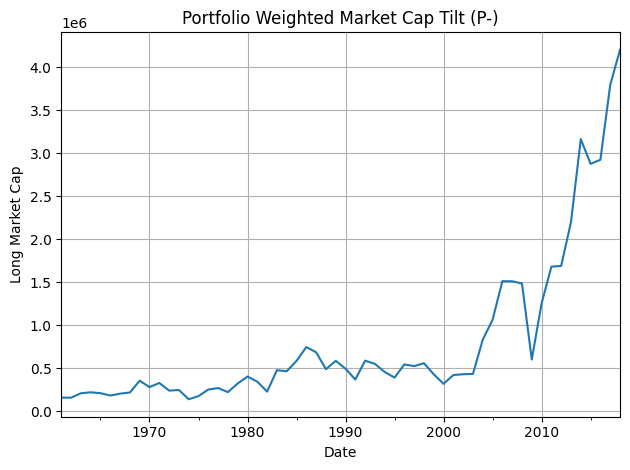

In [55]:
#Portfolio Weighted Market Cap Tilt at time t for portfolios built at t-1 - long
df_price_minus_long_ts = pd.DataFrame(price_minus_long_ts)
df_price_minus_long_ts.set_index("date", inplace=True)
df_price_minus_long_ts.index = pd.to_datetime(df_price_minus_long_ts.index)

#Portfolio Weighted Market Cap Tilt at time t for portfolios built at t-1 - short
df_price_minus_short_ts = pd.DataFrame(price_minus_short_ts)
df_price_minus_short_ts.set_index("date", inplace=True)
df_price_minus_short_ts.index = pd.to_datetime(df_price_minus_short_ts.index)
#df_price_minus_ts.index = df_price_minus_ts.index.to_timestamp()
df_price_minus_long_ts.plot(title="Portfolio Weighted Market Cap Tilt (P-)", legend=False)
#df_price_minus_short_ts.plot()
plt.ylabel("Long Market Cap")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()


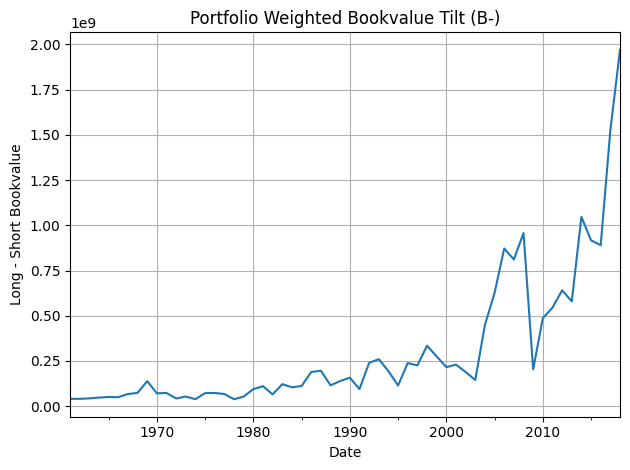

In [56]:
#Portfolio Weighted Bookvalue at time t for portfolios built at t-1 - long
df_bookvalue_minus_long_ts = pd.DataFrame(bookvalue_minus_long_ts)
df_bookvalue_minus_long_ts.set_index("date", inplace=True)
df_bookvalue_minus_long_ts.index = pd.to_datetime(df_bookvalue_minus_long_ts.index)

#Portfolio Weighted Bookvalue at time t for portfolios built at t-1 - short
df_bookvalue_minus_short_ts = pd.DataFrame(bookvalue_minus_short_ts)
df_bookvalue_minus_short_ts.set_index("date", inplace=True)
df_bookvalue_minus_short_ts.index = pd.to_datetime(df_bookvalue_minus_short_ts.index)

#df_bookvalue_minus_ts.index = df_bookvalue_minus_ts.index.to_timestamp()
df_bookvalue_minus_long_ts.plot(title="Portfolio Weighted Bookvalue Tilt (B-)", legend=False)
plt.ylabel("Long - Short Bookvalue")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()

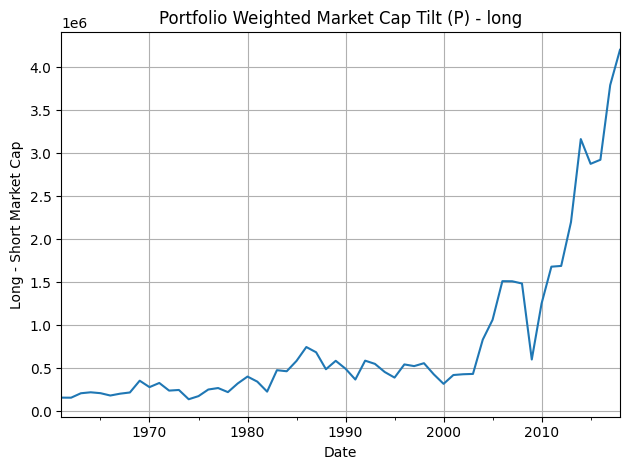

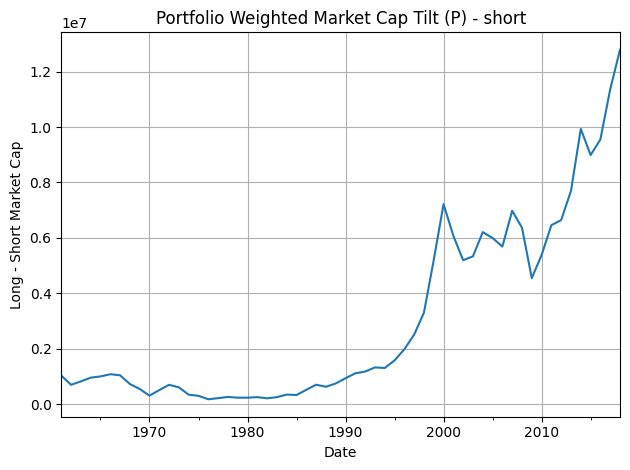

In [78]:
#Portfolio Weighted Market Cap Tilt (P) - long
df_price_long_ts = pd.DataFrame(price_long_ts)
df_price_long_ts.set_index("date", inplace=True)
df_price_long_ts.index = df_price_long_ts.index.to_timestamp()

#Portfolio Weighted Market Cap Tilt (P) - short
df_price_short_ts = pd.DataFrame(price_short_ts)
df_price_short_ts.set_index("date", inplace=True)
df_price_short_ts.index = df_price_short_ts.index.to_timestamp()

#df_price_minus_ts.index = df_price_minus_ts.index.to_timestamp()
df_price_long_ts.plot(title="Portfolio Weighted Market Cap Tilt (P) - long", legend=False)
plt.ylabel("Long - Short Market Cap")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()

df_price_short_ts.plot(title="Portfolio Weighted Market Cap Tilt (P) - short", legend=False)
plt.ylabel("Long - Short Market Cap")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()

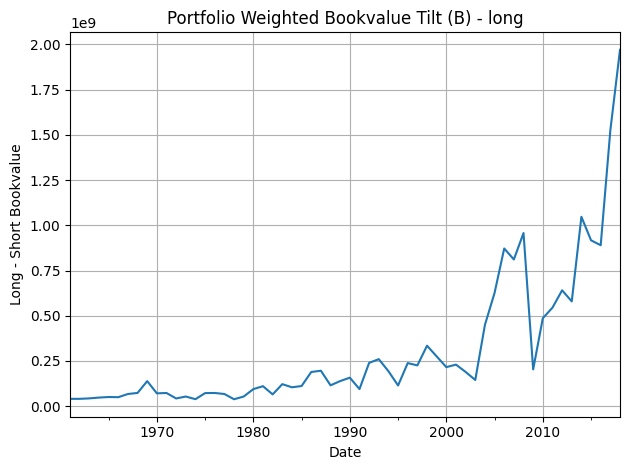

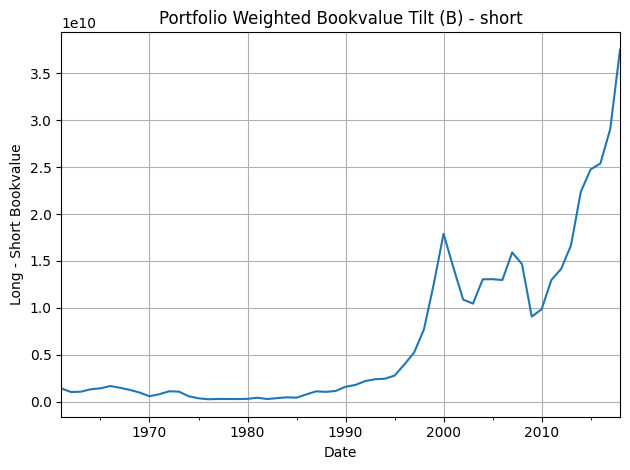

In [77]:
#Portfolio Weighted Bookvalue - long
df_bookvalue_long_ts = pd.DataFrame(bookvalue_long_ts)
df_bookvalue_long_ts.set_index("date", inplace=True)
df_bookvalue_long_ts.index = df_bookvalue_long_ts.index.to_timestamp()

#Portfolio Weighted Bookvalue - short
df_bookvalue_short_ts = pd.DataFrame(bookvalue_short_ts)
df_bookvalue_short_ts.set_index("date", inplace=True)
df_bookvalue_short_ts.index = df_bookvalue_short_ts.index.to_timestamp()

#df_price_minus_ts.index = df_price_minus_ts.index.to_timestamp()
df_bookvalue_long_ts.plot(title="Portfolio Weighted Bookvalue Tilt (B) - long", legend=False)
plt.ylabel("Long - Short Bookvalue")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()

df_bookvalue_short_ts.plot(title="Portfolio Weighted Bookvalue Tilt (B) - short", legend=False)
plt.ylabel("Long - Short Bookvalue")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()

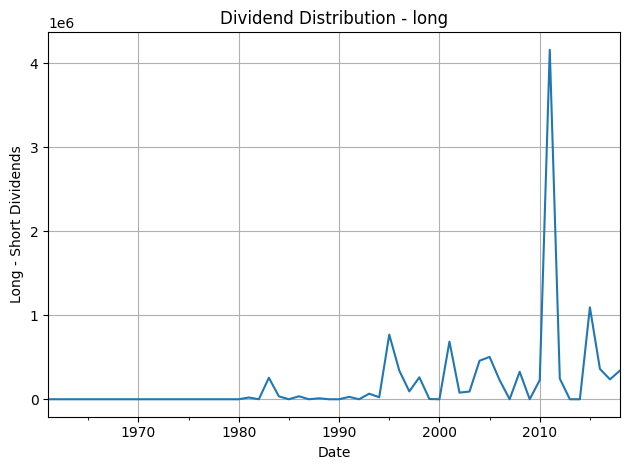

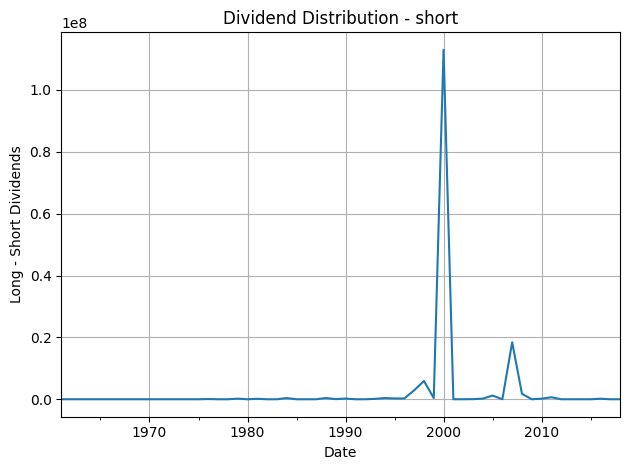

In [76]:
#Dividends - long
df_dividends_long_ts = pd.DataFrame(dividends_long_ts)
df_dividends_long_ts.set_index("date", inplace=True)
df_dividends_long_ts.index = df_dividends_long_ts.index.to_timestamp()

#Dividends - short
df_dividends_short_ts = pd.DataFrame(dividends_short_ts)
df_dividends_short_ts.set_index("date", inplace=True)
df_dividends_short_ts.index = df_dividends_short_ts.index.to_timestamp()

df_dividends_long_ts.plot(title="Dividend Distribution - long", legend=False)
plt.ylabel("Long - Short Dividends")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()

df_dividends_short_ts.plot(title="Dividend Distribution - short", legend=False)
plt.ylabel("Long - Short Dividends")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/47/ztkg05vx2hbdgfnfn0bh1y3w0000gn/T/ipykernel_53593/429704794.py:5: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  annual_returns = (1 + df_ls['long_short_ret']).resample('Y').prod() - 1


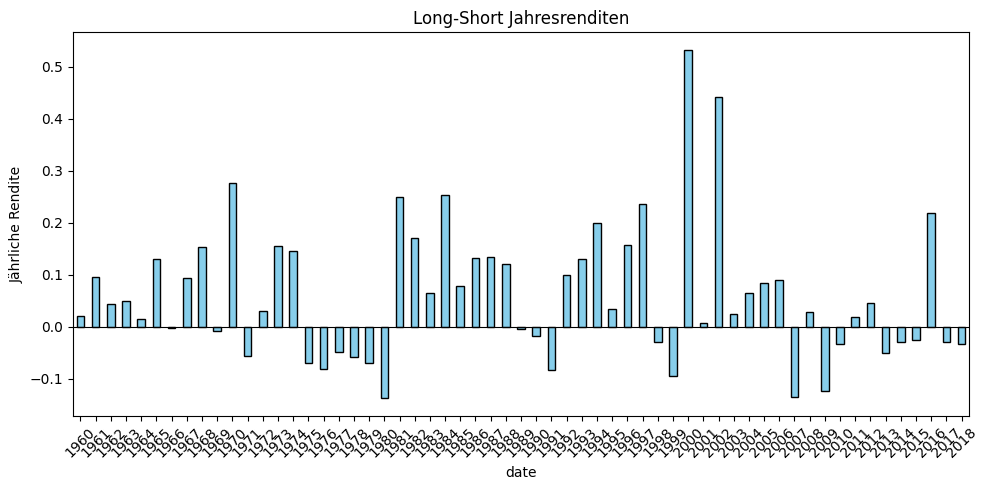

In [61]:
#df_ls['date'] = pd.to_datetime(df_ls['date'])
#df_ls = df_ls.set_index('date')

# Group by year, dann kumulierte Rendite berechnen
annual_returns = (1 + df_ls['long_short_ret']).resample('Y').prod() - 1
annual_returns.index = annual_returns.index.year  # Nur das Jahr anzeigen

#Annual log-returns to DataFrame
df_annual_log_returns_long_ts = pd.DataFrame(long_log_returns)
df_annual_log_returns_long_ts.set_index("date", inplace=True)
df_annual_log_returns_long_ts.index = pd.to_datetime(df_annual_log_returns_long_ts.index)

df_annual_log_returns_short_ts = pd.DataFrame(short_log_returns)
df_annual_log_returns_short_ts.set_index("date", inplace=True)
df_annual_log_returns_short_ts.index = pd.to_datetime(df_annual_log_returns_short_ts.index)

plt.figure(figsize=(10, 5))
annual_returns.plot(kind='bar', color='skyblue', edgecolor='black')
plt.ylabel('Jährliche Rendite')
plt.title('Long-Short Jahresrenditen')
plt.axhline(0, color='black', linewidth=0.8)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [62]:
df_portfolio_value_long = pd.DataFrame(portfolio_value_long)
df_portfolio_value_long.set_index("date", inplace=True)
df_portfolio_value_long.index = df_portfolio_value_long.index.to_timestamp()
df_portfolio_value_short = pd.DataFrame(portfolio_value_short)
df_portfolio_value_short.set_index("date", inplace=True)
df_portfolio_value_short.index = df_portfolio_value_short.index.to_timestamp()
# Ensure both are pandas Series and sorted
df_portfolio_value_long = df_portfolio_value_long.sort_index()
df_portfolio_value_short = df_portfolio_value_short.sort_index()

# Compute log returns separately
log_ret_long = np.log(df_portfolio_value_long) - np.log(df_portfolio_value_long.shift(1))
log_ret_short = np.log(df_portfolio_value_short) - np.log(df_portfolio_value_short.shift(1))

# Compute portfolio log return (long - short)
portfolio_log_returns = log_ret_long - log_ret_short


In [71]:
# Make sure all relevant columns are numeric
df_bookvalue_long_ts = df_bookvalue_long_ts.apply(pd.to_numeric, errors='coerce')
df_bookvalue_minus_long_ts = df_bookvalue_minus_long_ts.apply(pd.to_numeric, errors='coerce')
df_price_long_ts = df_price_long_ts.apply(pd.to_numeric, errors='coerce')
df_price_minus_long_ts = df_price_minus_long_ts.apply(pd.to_numeric, errors='coerce')
df_dividends_long_ts = df_dividends_long_ts.apply(pd.to_numeric, errors='coerce')
df_bookvalue_short_ts = df_bookvalue_short_ts.apply(pd.to_numeric, errors='coerce')
df_bookvalue_minus_short_ts = df_bookvalue_minus_short_ts.apply(pd.to_numeric, errors='coerce')
df_price_short_ts = df_price_short_ts.apply(pd.to_numeric, errors='coerce')
df_price_minus_short_ts = df_price_minus_short_ts.apply(pd.to_numeric, errors='coerce')
df_dividends_short_ts = df_dividends_short_ts.apply(pd.to_numeric, errors='coerce')

# Align indexes if needed
common_index = df_bookvalue_long_ts.index.intersection(df_price_long_ts.index)
df_bookvalue_long_ts = df_bookvalue_long_ts.loc[common_index]
df_bookvalue_minus_long_ts = df_bookvalue_minus_long_ts.loc[common_index]
df_price_long_ts = df_price_long_ts.loc[common_index]
df_price_minus_long_ts = df_price_minus_long_ts.loc[common_index]
df_dividends_long_ts = df_dividends_long_ts.loc[common_index]
common_index = df_bookvalue_short_ts.index.intersection(df_price_short_ts.index)
df_bookvalue_short_ts = df_bookvalue_short_ts.loc[common_index]
df_bookvalue_minus_short_ts = df_bookvalue_minus_short_ts.loc[common_index]
df_price_short_ts = df_price_short_ts.loc[common_index]
df_price_minus_short_ts = df_price_minus_short_ts.loc[common_index]
df_dividends_short_ts = df_dividends_short_ts.loc[common_index]

# Filter zero or negative values to avoid log issues
valid = (df_bookvalue_long_ts.shift(1) > 0) & (df_price_minus_long_ts > 0)
valid &= df_bookvalue_minus_long_ts > 0
valid &= df_price_long_ts > 0
valid &= df_bookvalue_long_ts > 0

valid = (df_bookvalue_short_ts.shift(1) > 0) & (df_price_minus_short_ts > 0)
valid &= df_bookvalue_minus_short_ts > 0
valid &= df_price_short_ts > 0
valid &= df_bookvalue_short_ts > 0



In [72]:
#Return to Value
annual_log_return =df_annual_log_returns_long_ts - df_annual_log_returns_short_ts

#Return to Value in three components
change_in_aggregate_valuation_long = np.log(df_price_long_ts/df_bookvalue_long_ts)-np.log(df_price_long_ts.shift(1)/df_bookvalue_long_ts.shift(1))
change_in_aggregate_valuation_short = np.log(df_price_short_ts/df_bookvalue_short_ts)-np.log(df_price_short_ts.shift(1)/df_bookvalue_short_ts.shift(1))
#income_yield = np.log(df_bookvalue_minus_ts/df_bookvalue_ts.shift(1))+np.log(1+ df_dividends_ts/df_price_minus_ts)
#migration = np.log(df_price_minus_ts/df_bookvalue_minus_ts)-np.log(df_price_ts/df_bookvalue_ts)

# Income Yield long
income_yield_long = np.log(df_bookvalue_minus_long_ts/df_bookvalue_long_ts.shift(1))+np.log(1+df_dividends_long_ts/df_price_minus_long_ts)
# Income Yield short
income_yield_short = np.log(df_bookvalue_minus_short_ts/df_bookvalue_short_ts.shift(1))+np.log(1+df_dividends_short_ts/df_price_minus_short_ts)

#Migration long
migration_long = np.log(df_price_minus_long_ts/df_bookvalue_minus_long_ts)-np.log(df_price_long_ts/df_bookvalue_long_ts)
#Migration short
migration_short = np.log(df_price_minus_short_ts/df_bookvalue_minus_short_ts)-np.log(df_price_short_ts/df_bookvalue_short_ts)



revaluation_component_long = change_in_aggregate_valuation_long
structural_component_long = income_yield_long + migration_long

revaluation_component_short = change_in_aggregate_valuation_short
structural_component_short = income_yield_short + migration_short

return_decomposition_long = revaluation_component_long + structural_component_long
return_decomposition_short = revaluation_component_short + structural_component_short

return_decomposition = return_decomposition_long - return_decomposition_short



In [73]:
# Apply NaN handling: fill where appropriate, avoid dividing by 0 or log(0)
eps = 1e-6  # Small value to avoid log(0)

df_price_long_ts = df_price_long_ts.replace(0, np.nan).fillna(method='ffill')
df_bookvalue_long_ts = df_bookvalue_long_ts.replace(0, np.nan).fillna(method='ffill')
df_dividends_long_ts = df_dividends_long_ts.fillna(0)
df_price_minus_long_ts = df_price_minus_long_ts.replace(0, np.nan).fillna(method='ffill')
df_bookvalue_minus_long_ts = df_bookvalue_minus_long_ts.replace(0, np.nan).fillna(method='ffill')

df_price_short_ts = df_price_short_ts.replace(0, np.nan).fillna(method='ffill')
df_bookvalue_short_ts = df_bookvalue_short_ts.replace(0, np.nan).fillna(method='ffill')
df_dividends_short_ts = df_dividends_short_ts.fillna(0)
df_price_minus_short_ts = df_price_minus_short_ts.replace(0, np.nan).fillna(method='ffill')
df_bookvalue_minus_short_ts = df_bookvalue_minus_short_ts.replace(0, np.nan).fillna(method='ffill')

# Revaluation component (change in P/B ratio)
change_in_aggregate_valuation_long = np.log((df_price_long_ts / df_bookvalue_long_ts + eps)) - \
                                     np.log((df_price_long_ts.shift(1) / df_bookvalue_long_ts.shift(1) + eps))

change_in_aggregate_valuation_short = np.log((df_price_short_ts / df_bookvalue_short_ts + eps)) - \
                                      np.log((df_price_short_ts.shift(1) / df_bookvalue_short_ts.shift(1) + eps))

# Income Yield
income_yield_long = np.log((df_bookvalue_minus_long_ts / df_bookvalue_long_ts.shift(1) + eps)) + \
                    np.log(1 + df_dividends_long_ts / df_price_minus_long_ts.replace(0, np.nan).fillna(method='ffill'))

income_yield_short = np.log((df_bookvalue_minus_short_ts / df_bookvalue_short_ts.shift(1) + eps)) + \
                     np.log(1 + df_dividends_short_ts / df_price_minus_short_ts.replace(0, np.nan).fillna(method='ffill'))

# Migration component
migration_long = np.log((df_price_minus_long_ts / df_bookvalue_minus_long_ts + eps)) - \
                 np.log((df_price_long_ts / df_bookvalue_long_ts + eps))

migration_short = np.log((df_price_minus_short_ts / df_bookvalue_minus_short_ts + eps)) - \
                  np.log((df_price_short_ts / df_bookvalue_short_ts + eps))

# Compose components
revaluation_component_long = change_in_aggregate_valuation_long.fillna(0)
structural_component_long = (income_yield_long + migration_long).fillna(0)

revaluation_component_short = change_in_aggregate_valuation_short.fillna(0)
structural_component_short = (income_yield_short + migration_short).fillna(0)

return_decomposition_long = revaluation_component_long + structural_component_long
return_decomposition_short = revaluation_component_short + structural_component_short

return_decomposition = return_decomposition_long - return_decomposition_short

/var/folders/47/ztkg05vx2hbdgfnfn0bh1y3w0000gn/T/ipykernel_53593/2037302921.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_price_long_ts = df_price_long_ts.replace(0, np.nan).fillna(method='ffill')
/var/folders/47/ztkg05vx2hbdgfnfn0bh1y3w0000gn/T/ipykernel_53593/2037302921.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bookvalue_long_ts = df_bookvalue_long_ts.replace(0, np.nan).fillna(method='ffill')
/var/folders/47/ztkg05vx2hbdgfnfn0bh1y3w0000gn/T/ipykernel_53593/2037302921.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_price_minus_long_ts = df_price_minus_long_ts.replace(0, np.nan).fillna(method='ffill')
/var/folders/47/ztkg05vx2hbdgfnfn0bh1y3w0000gn/T/ipykernel_53593/2037302921.py:8: Futu

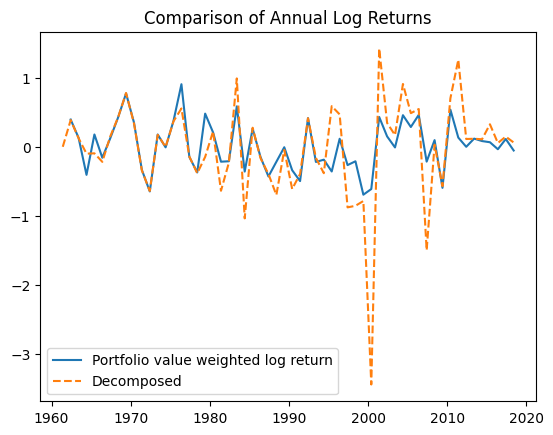

In [74]:

plt.plot(portfolio_log_returns.index, portfolio_log_returns, label="Portfolio value weighted log return")
plt.plot(return_decomposition.index, return_decomposition, label="Decomposed", linestyle='--')
plt.legend()
plt.title("Comparison of Annual Log Returns")
plt.show()


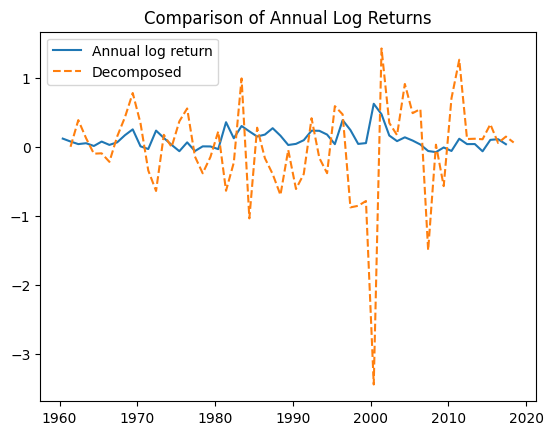

In [75]:
plt.plot(annual_log_return.index, annual_log_return, label="Annual log return")
plt.plot(return_decomposition.index, return_decomposition, label="Decomposed", linestyle='--')
plt.legend()
plt.title("Comparison of Annual Log Returns")
plt.show()